In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    category_data = df[df['attack'] == category]

    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)

    elif len(category_data) == 1:
        test_data = pd.concat([test_data,category_data])
        noise_data = category_data.copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue

    elif len(category_data) > 1 and len(category_data) <= 5:
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])
        continue
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100,
                            min_samples_split= 7,
                            max_features= 'sqrt',
                            max_depth= 30)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

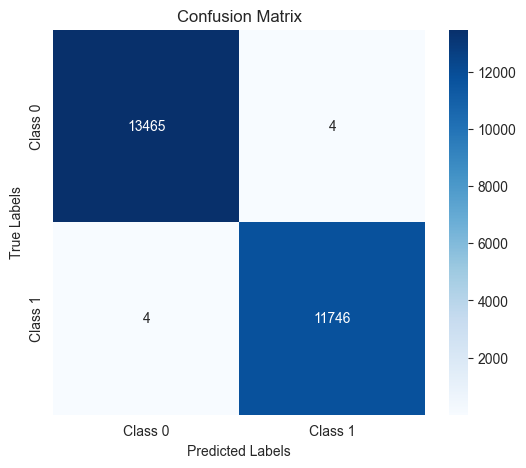

In [12]:
from sklearn.metrics import confusion_matrix


cmrf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf,target_names=['normal','attack']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13469
      attack       1.00      1.00      1.00     11750

    accuracy                           1.00     25219
   macro avg       1.00      1.00      1.00     25219
weighted avg       1.00      1.00      1.00     25219



In [14]:
y_pred_df = pd.DataFrame(y_pred_rf,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [15]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]
combined_pred.head()

,is_attack,is_attack_pred,predict_prob
18091,0,0,0.0
29741,0,0,0.0
76709,0,0,0.0
91928,0,0,0.0
39962,0,0,0.0


In [16]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25215, 3)

In [17]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
18091,-0.109310,2.223247,-1.176121,0.751235,-0.007738,-0.005282,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,0.182993,2.168315,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.336050,0.736037,1.258282,1.066428,-0.438895,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,-0.656686,-0.540977,-0.251738,-0.242117,-0.503684,1.161685,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,1.304689,-0.292250,0,0,0.0,normal,normal
29741,-0.109310,-0.124694,-0.442344,0.751235,-0.007699,-0.002285,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,1.233623,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.585893,-0.148030,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,0.736037,1.258282,1.066428,-0.438895,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.099828,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,1.304689,-0.292250,0,0,0.0,normal,normal
76709,-0.109310,2.223247,-1.176121,0.751235,-0.007741,-0.005290,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.725690,-0.368634,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,-1.379012,0.734390,1.066428,-0.438895,2.765734,-0.199832,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.329193,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,0.800660,-0.292250,0,0,0.0,normal,normal
91928,-0.109310,2.223247,1.086357,0.751235,-0.007729,-0.005277,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.673266,-0.368634,-0.637508,-0.632041,-0.374377,-0.374536,-1.185460,1.260422,-0.374559,0.736037,1.204086,1.021869,-0.385953,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,-0.656686,-0.540977,-0.251738,-0.242117,-0.503684,-0.329480,-0.155956,-0.62548,-0.343026,-0.173353,-0.418809,1.209271,0.212258,0,0,0.0,normal,normal
39962,-0.098889,2.223247,-1.176121,0.751235,-0.007741,-0.005303,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.708215,-0.313483,-0.637508,-0.632041,-0.374377,-0.374536,-0.753260,3.369680,1.165796,-1.207794,-0.755990,-0.002982,-0.174187,-0.414617,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.329337,-0.156351,-0.62548,-0.343026,-0.173353,-0.418809,-0.766696,0.031932,0,0,0.0,normal,normal


In [18]:
attacks = op[np.logical_or(op['is_attack_pred'] == 1,np.logical_or(op['is_attack'] == 1,op['is_attack_pred'] == 1))].copy()
attacks.shape

(11750, 59)

In [19]:
all_attacks1 = attacks['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = attacks[attacks['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        test1_data = pd.concat([test1_data,category_data])
        noise_data = category_data.copy()
        noise_data['count'] += 0.0001
        #display(category_data)
        #display(noise_data)
        train1_data = pd.concat([train1_data,noise_data],axis=0)
        # print(train1_data[train1_data['attack'] == category].shape)
        continue
    elif len(category_data) > 1 and len(category_data) <= 5:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train1_data = pd.concat([train1_data,noise_data],axis=0)
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])
        continue
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [20]:
X1_train = train1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_train = train1_data['attack_category']
X1_test = test1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_test = test1_data['attack_category']

In [21]:
X1_train.drop(['is_attack_pred', 'predict_prob'],axis=1,inplace=True)
X1_test.drop(['is_attack_pred', 'predict_prob'],axis=1,inplace=True)

In [22]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)

In [23]:
rf2 = RandomForestClassifier(random_state=42,class_weight='balanced',
                             n_estimators= 200,
                            min_samples_split=2,
                            max_features='log2',
                            max_depth=None)
rf2.fit(X1_train,y1_train_encoded)
y_pred1 = rf2.predict(X1_test)

In [24]:
target_classes = [target_encoder.classes_[i] for i in range(len(target_encoder.classes_))]

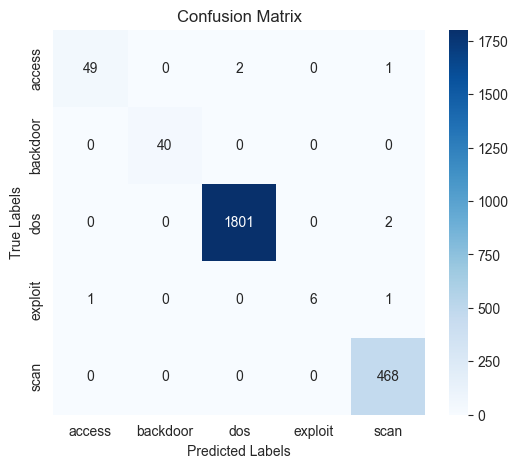

In [25]:
cm1 = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50,100, 150,200],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 7,10],
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X1_train, y1_train_encoded)
random_search.best_estimator_


d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 240 is smaller than n_iter=500. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=42)

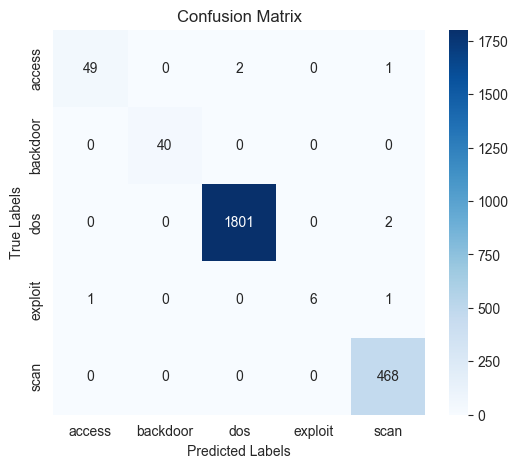

In [27]:
best_clf = random_search.best_estimator_
y_pred22= best_clf.predict(X1_test)

cmbest = confusion_matrix(y1_test_encoded, y_pred22)

plt.figure(figsize=(6, 5))
sns.heatmap(cmbest, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00      1803
           3       1.00      0.75      0.86         8
           4       0.99      1.00      1.00       468

    accuracy                           1.00      2371
   macro avg       0.99      0.94      0.96      2371
weighted avg       1.00      1.00      1.00      2371



In [29]:
y1_pred_df = pd.DataFrame(y_pred1,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [30]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = rf2.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [31]:
ocategory = dict()
for i in range(len(target_encoder.classes_)):
    ocategory[i] = target_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [32]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [33]:
combined_pred1[combined_pred1['attack_category_pred'] != combined_pred1['attack_category']]

,attack_category,attack_category_pred,predict_prob
81558,dos,scan,0.105
9339,dos,scan,0.000
35434,access,scan,0.055
73906,exploit,scan,0.010
58304,access,dos,0.000
6086,access,dos,0.010
113266,exploit,access,0.010


In [34]:
combined_pred1 = combined_pred1[combined_pred1['attack_category'] == combined_pred1['attack_category_pred']]
combined_pred1.shape

(2364, 3)

In [35]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack_category_pred,predict_prob,attack
92447,-0.10931,-0.124694,-1.359565,-1.850982,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.030515,-0.368634,-0.637508,-0.632041,2.746180,2.713674,-1.503923,0.039273,-0.374559,0.736037,-1.036001,-1.161510,-0.015362,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,0.217400,-0.540977,2.927971,0.109288,-0.503684,-0.343529,0.083219,-0.625480,3.321313,-0.138181,-0.418809,-0.911300,-0.276041,dos,dos,0.000,neptune
6373,-0.10931,-0.124694,0.107988,-2.222727,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.467381,-0.203181,-0.637508,-0.632041,2.746180,2.713674,-1.390186,0.039273,-0.374559,0.736037,-0.927610,-1.050113,-0.068304,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,-0.219643,-0.540977,3.715028,4.326152,-0.503684,-0.162903,0.152345,-0.625480,3.321313,0.283884,-0.418809,-0.905651,-0.107871,dos,dos,0.000,neptune
112415,-0.10931,-0.124694,-0.442344,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.594630,-0.148030,1.602008,1.470752,-0.374377,-0.189244,0.770813,-0.349275,0.087548,-1.671090,-0.900512,1.066428,-0.438895,-0.284807,-0.28857,1.609093,1.618990,-0.387847,-0.376424,-2.404860,-0.357917,-0.251738,0.116316,2.138333,-0.114163,-0.196049,-0.482344,-0.343026,-0.173353,1.175281,-0.772258,-0.292250,dos,dos,0.015,neptune
15105,-0.10931,-0.124694,-0.686936,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.428621,-0.285908,1.534823,1.604973,-0.280760,-0.374536,-1.048976,0.427820,-0.374559,0.736037,-0.792121,-0.916436,-0.174187,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,-0.656686,-0.152547,-0.235210,-0.242117,0.653645,-0.243181,-0.099273,1.655744,-0.343026,-0.173353,2.370849,-0.884534,-0.008591,dos,dos,0.000,neptune
87189,-0.10931,-0.124694,1.086357,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.240211,-0.203181,1.602008,1.604973,-0.374377,-0.374536,-1.367439,-0.016234,-0.374559,0.736037,-1.008903,-1.116951,-0.015362,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,0.654444,2.044739,-0.251738,-0.242117,1.645642,-0.149141,0.071764,1.655744,-0.343026,-0.173353,-0.020287,-0.910605,-0.227413,dos,dos,0.000,neptune


In [36]:
final = op1.drop(['attack_category','predict_prob'],axis=1)
final.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category_pred,attack
92447,-0.10931,-0.124694,-1.359565,-1.850982,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.030515,-0.368634,-0.637508,-0.632041,2.746180,2.713674,-1.503923,0.039273,-0.374559,0.736037,-1.036001,-1.161510,-0.015362,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,0.217400,-0.540977,2.927971,0.109288,-0.503684,-0.343529,0.083219,-0.625480,3.321313,-0.138181,-0.418809,-0.911300,-0.276041,dos,neptune
6373,-0.10931,-0.124694,0.107988,-2.222727,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.467381,-0.203181,-0.637508,-0.632041,2.746180,2.713674,-1.390186,0.039273,-0.374559,0.736037,-0.927610,-1.050113,-0.068304,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,-0.219643,-0.540977,3.715028,4.326152,-0.503684,-0.162903,0.152345,-0.625480,3.321313,0.283884,-0.418809,-0.905651,-0.107871,dos,neptune
112415,-0.10931,-0.124694,-0.442344,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.594630,-0.148030,1.602008,1.470752,-0.374377,-0.189244,0.770813,-0.349275,0.087548,-1.671090,-0.900512,1.066428,-0.438895,-0.284807,-0.28857,1.609093,1.618990,-0.387847,-0.376424,-2.404860,-0.357917,-0.251738,0.116316,2.138333,-0.114163,-0.196049,-0.482344,-0.343026,-0.173353,1.175281,-0.772258,-0.292250,dos,neptune
15105,-0.10931,-0.124694,-0.686936,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.428621,-0.285908,1.534823,1.604973,-0.280760,-0.374536,-1.048976,0.427820,-0.374559,0.736037,-0.792121,-0.916436,-0.174187,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,-0.656686,-0.152547,-0.235210,-0.242117,0.653645,-0.243181,-0.099273,1.655744,-0.343026,-0.173353,2.370849,-0.884534,-0.008591,dos,neptune
87189,-0.10931,-0.124694,1.086357,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.240211,-0.203181,1.602008,1.604973,-0.374377,-0.374536,-1.367439,-0.016234,-0.374559,0.736037,-1.008903,-1.116951,-0.015362,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,0.654444,2.044739,-0.251738,-0.242117,1.645642,-0.149141,0.071764,1.655744,-0.343026,-0.173353,-0.020287,-0.910605,-0.227413,dos,neptune


In [37]:
dos_data = final[final['attack_category_pred'] == 'dos'].copy()
dos_data.drop('attack_category_pred',axis=1,inplace=True)

scan_data = final[final['attack_category_pred'] == 'scan'].copy()
scan_data.drop('attack_category_pred',axis=1,inplace=True)

backdoor_data = final[final['attack_category_pred'] == 'backdoor'].copy()
backdoor_data.drop('attack_category_pred',axis=1,inplace=True)

access_data = final[final['attack_category_pred'] == 'access'].copy()
access_data.drop('attack_category_pred',axis=1,inplace=True)

exploit_data = final[final['attack_category_pred'] == 'exploit'].copy()
exploit_data.drop('attack_category_pred',axis=1,inplace=True)

In [38]:
dos_train = pd.DataFrame()
dos_test = pd.DataFrame()

for category in dos_data['attack'].unique():
    # Get data for the current category
    category_data = dos_data[dos_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        dos_train = pd.concat([dos_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    dos_train = pd.concat([dos_train,category_train])
    dos_test = pd.concat([dos_test,category_test])

dosxtrain = dos_train.drop(['attack'],axis=1)
dosytrain = dos_train['attack']
dosxtest = dos_test.drop(['attack'],axis=1)
dosytest = dos_test['attack']

In [39]:
scan_train = pd.DataFrame()
scan_test = pd.DataFrame()

for category in scan_data['attack'].unique():
    # Get data for the current category
    category_data = scan_data[scan_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        scan_train = pd.concat([scan_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    scan_train = pd.concat([scan_train,category_train])
    scan_test = pd.concat([scan_test,category_test])

scanxtrain = scan_train.drop(['attack'],axis=1)
scanytrain = scan_train['attack']
scanxtest = scan_test.drop(['attack'],axis=1)
scanytest = scan_test['attack']

In [40]:
access_train = pd.DataFrame()
access_test = pd.DataFrame()

for category in access_data['attack'].unique():
    # Get data for the current category
    category_data = access_data[access_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        access_train = pd.concat([access_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    access_train = pd.concat([access_train,category_train])
    access_test = pd.concat([access_test,category_test])

accessxtrain = access_train.drop(['attack'],axis=1)
accessytrain = access_train['attack']
accessxtest = access_test.drop(['attack'],axis=1)
accessytest = access_test['attack']

In [41]:
backdoor_train = pd.DataFrame()
backdoor_test = pd.DataFrame()

for category in backdoor_data['attack'].unique():
    # Get data for the current category
    category_data = backdoor_data[backdoor_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        backdoor_train = pd.concat([backdoor_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    backdoor_train = pd.concat([backdoor_train,category_train])
    backdoor_test = pd.concat([backdoor_test,category_test])

backdoorxtrain = backdoor_train.drop(['attack'],axis=1)
backdoorytrain = backdoor_train['attack']
backdoorxtest = backdoor_test.drop(['attack'],axis=1)
backdoorytest = backdoor_test['attack']

In [42]:
exploit_train = pd.DataFrame()
exploit_test = pd.DataFrame()

for category in exploit_data['attack'].unique():
    # Get data for the current category
    category_data = exploit_data[exploit_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        exploit_train = pd.concat([exploit_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    exploit_train = pd.concat([exploit_train,category_train])
    exploit_test = pd.concat([exploit_test,category_test])

exploitxtrain = exploit_train.drop(['attack'],axis=1)
exploitytrain = exploit_train['attack']
exploitxtest = exploit_test.drop(['attack'],axis=1)
exploitytest = exploit_test['attack']

In [43]:
dos_encoder = LabelEncoder()
dosytrain = dos_encoder.fit_transform(dosytrain)
dosytest = dos_encoder.transform(dosytest)

scan_encoder = LabelEncoder()
scanytrain = scan_encoder.fit_transform(scanytrain)
scanytest = scan_encoder.transform(scanytest)

access_encoder = LabelEncoder()
accessytrain = access_encoder.fit_transform(accessytrain)
accessytest = access_encoder.transform(accessytest)

backdoor_encoder = LabelEncoder()
backytrain = backdoor_encoder.fit_transform(backdoorytrain)
backytest = backdoor_encoder.transform(backdoorytest)

exploit_encoder = LabelEncoder()
exploitytrain= exploit_encoder.fit_transform(exploitytrain)
exploitytest = exploit_encoder.transform(exploitytest)

In [44]:
rfdos = RandomForestClassifier(class_weight='balanced',random_state=42)
rfdos.fit(dosxtrain, dosytrain)
y_pred_dos= rfdos.predict(dosxtest)

rfscan = RandomForestClassifier(class_weight='balanced',random_state=42)
rfscan.fit(scanxtrain, scanytrain)
y_pred_scan= rfscan.predict(scanxtest)

rfback = RandomForestClassifier(class_weight='balanced',random_state=42)
rfback.fit(backdoorxtrain, backdoorytrain)
y_pred_back = rfback.predict(backdoorxtest)

rfaccess = RandomForestClassifier(class_weight='balanced',random_state=42)
rfaccess.fit(accessxtrain, accessytrain)
y_pred_access= rfaccess.predict(accessxtest)

rfexploit = RandomForestClassifier(class_weight='balanced',random_state=42)
rfexploit.fit(exploitxtrain, exploitytrain)
y_pred_exploit = rfexploit.predict(exploitxtest)

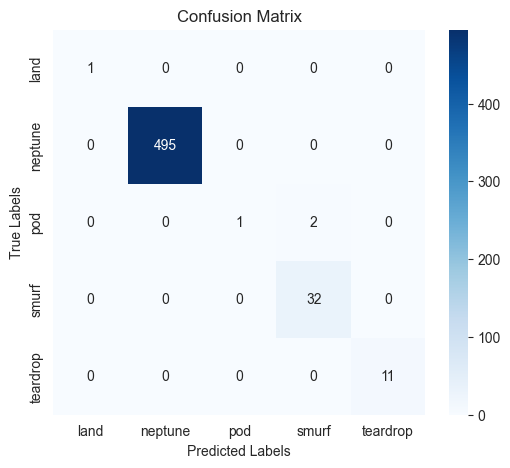

In [45]:
cmdos = confusion_matrix(dosytest, y_pred_dos)
dos_labels = [dos_encoder.classes_[i] for i in range(len(np.unique(dosytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmdos, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(dosytest, y_pred_dos,target_names=dos_labels))

              precision    recall  f1-score   support

        land       1.00      1.00      1.00         1
     neptune       1.00      1.00      1.00       495
         pod       1.00      0.33      0.50         3
       smurf       0.94      1.00      0.97        32
    teardrop       1.00      1.00      1.00        11

    accuracy                           1.00       542
   macro avg       0.99      0.87      0.89       542
weighted avg       1.00      1.00      1.00       542



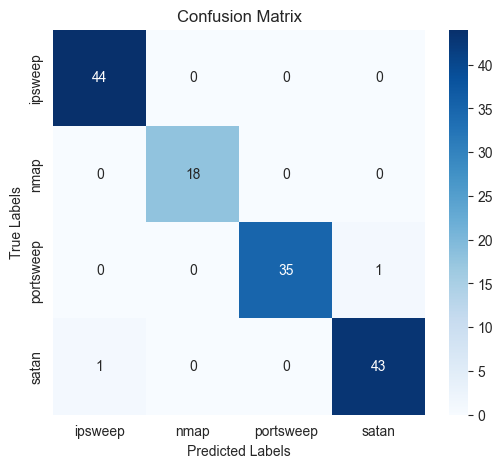

In [47]:
cmscan = confusion_matrix(scanytest, y_pred_scan)
scan_labels = [scan_encoder.classes_[i] for i in range(len(np.unique(scanytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmscan, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print(classification_report(scanytest, y_pred_scan,target_names=scan_labels))

              precision    recall  f1-score   support

     ipsweep       0.98      1.00      0.99        44
        nmap       1.00      1.00      1.00        18
   portsweep       1.00      0.97      0.99        36
       satan       0.98      0.98      0.98        44

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


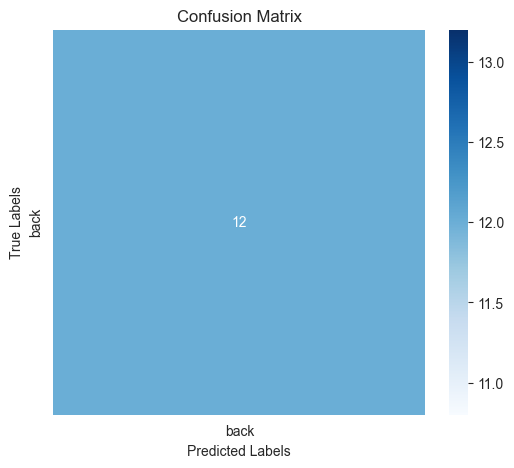

In [49]:
cmsback = confusion_matrix(backdoorytest, y_pred_back)
back_labels = [backdoor_encoder.classes_[i] for i in range(len(np.unique(backdoorytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmsback, annot=True, fmt='d', cmap='Blues',xticklabels=back_labels, yticklabels=back_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(backdoorytest, y_pred_back,target_names=back_labels))

              precision    recall  f1-score   support

        back       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



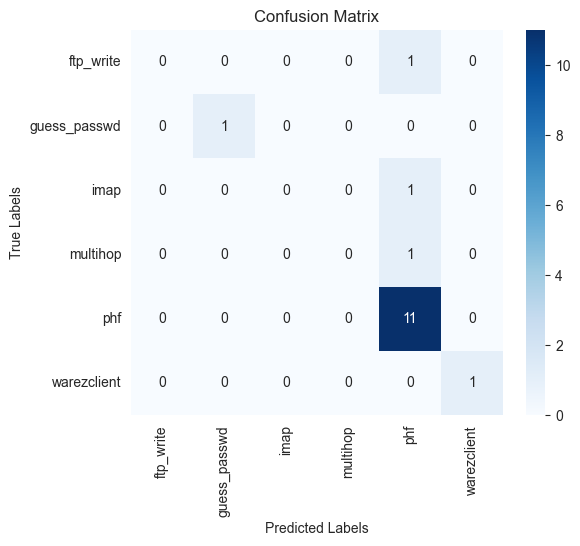

In [51]:
cmaccess = confusion_matrix(accessytest, y_pred_access)
access_labels = [access_encoder.classes_[i] for i in range(len(np.unique(accessytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


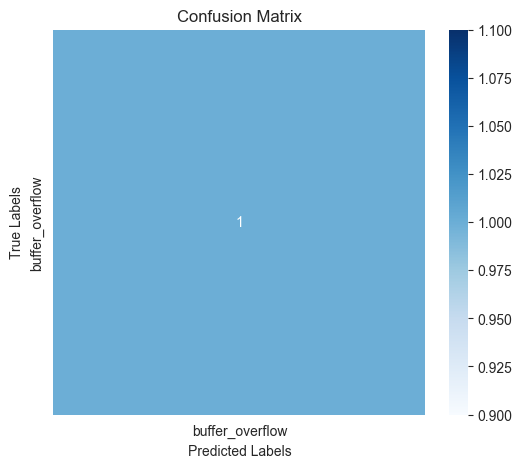

In [52]:
cmexploit = confusion_matrix(exploitytest, y_pred_exploit)
exploit_labels = [exploit_encoder.classes_[i] for i in range(len(np.unique(exploitytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmexploit, annot=True, fmt='d', cmap='Blues',xticklabels=exploit_labels,yticklabels=exploit_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
df['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64